In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def ridge_regression(X, y, lambda_val):
    """
    Perform ridge regression to estimate the coefficients of a linear model.

    Parameters:
    X : The input matrix of shape (n_samples, n_features)
    y : The target vector of shape (n_samples)
    lambda_val : The regularization parameter

    Returns:
    w: The estimated coefficients of the linear model
    """
    I = np.eye(X.shape[1])
    I[0,0] = 0
    reg_term = lambda_val * I # creates the regularization term, lambda * I 
    w = np.linalg.solve(X.T @ X + reg_term, X.T @ y) # solves for w using (X^T * X + lambda * I)^-1 * X^T * y
    return w

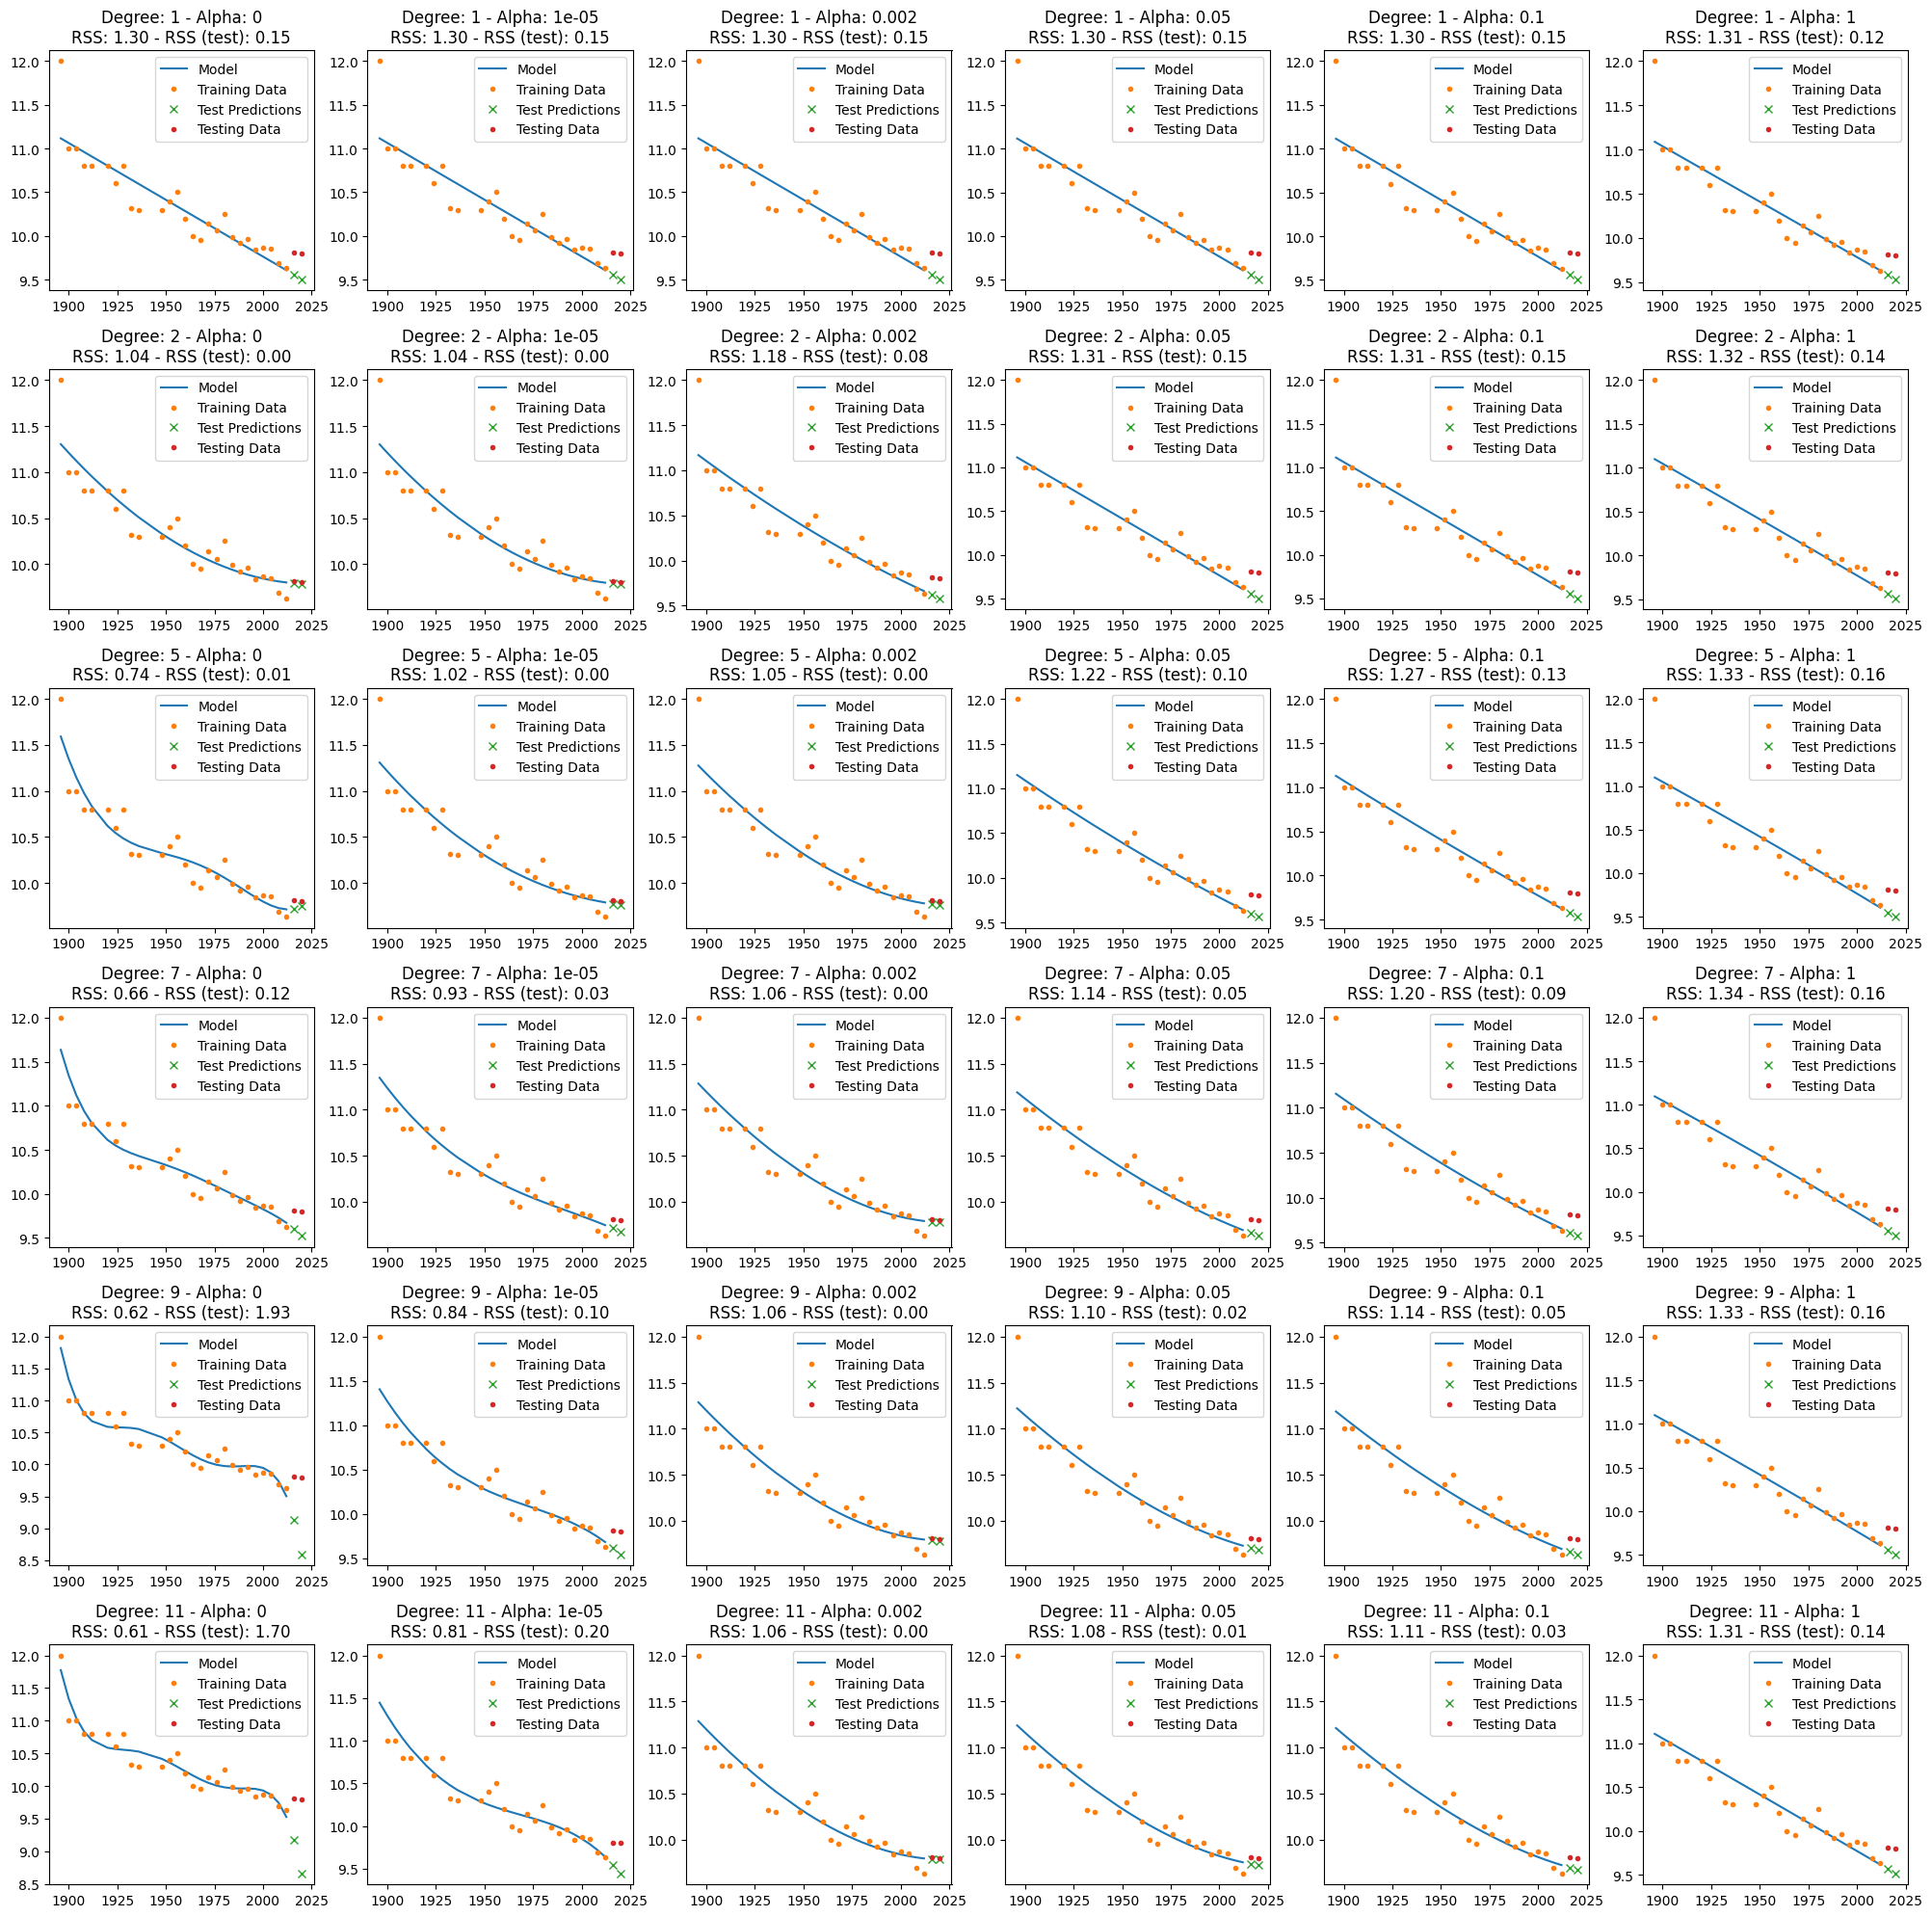

In [16]:
# Load the dataset
ds = pd.read_csv('olympics_100m.csv', sep=',')

# Split the dataset into training and testing sets
training, testing = ds[:-2], ds[-2:]

# Prepare the training and testing data
X_train = training['Year'].values.reshape(-1,1)
y_train = training['Time'].values
X_test = testing['Year'].values.reshape(-1,1)
y_test = testing['Time'].values

# Set the figure size for the plots
plt.rcParams['figure.figsize'] = [15, 10]

# Define the alphas and degrees
alphas = [0, 0.00001, 0.002, 0.05, 0.1, 1]
degrees = [1, 2, 5, 7, 9, 11]

# Create subplots
fig, axs = plt.subplots(len(degrees), len(alphas), figsize=(20, 20))

for i, degree in enumerate(degrees):
    for j, alpha in enumerate(alphas):
        # Create polynomial features
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Standardize the features (excluding the bias term)
        scaler = StandardScaler()
        X_train_poly[:,1:] = scaler.fit_transform(X_train_poly[:,1:])
        X_test_poly[:,1:] = scaler.transform(X_test_poly[:,1:])

        # Perform ridge regression
        w = ridge_regression(X_train_poly, y_train - y_train.mean(), alpha)
        y_hat_train = np.dot(X_train_poly, w) + y_train.mean()
        y_hat_test = np.dot(X_test_poly, w) + y_train.mean()

        # Calculate the Residual Sum of Squares (RSS)
        rss_train = np.sum((y_train - y_hat_train) ** 2)
        rss_test = np.sum((y_test - y_hat_test) ** 2)

        # Plot the results
        ax = axs[i, j]
        ax.plot(X_train[:,0], y_hat_train, label='Model')
        ax.plot(X_train[:,0], y_train, '.', label='Training Data')
        ax.plot(X_test[:,0], y_hat_test, 'x', label='Test Predictions')
        ax.plot(X_test[:,0], y_test, '.', label='Testing Data')
        ax.set_title(f'Degree: {degree} - Alpha: {alpha}\nRSS: {rss_train:.2f} - RSS (test): {rss_test:.2f}')
        ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

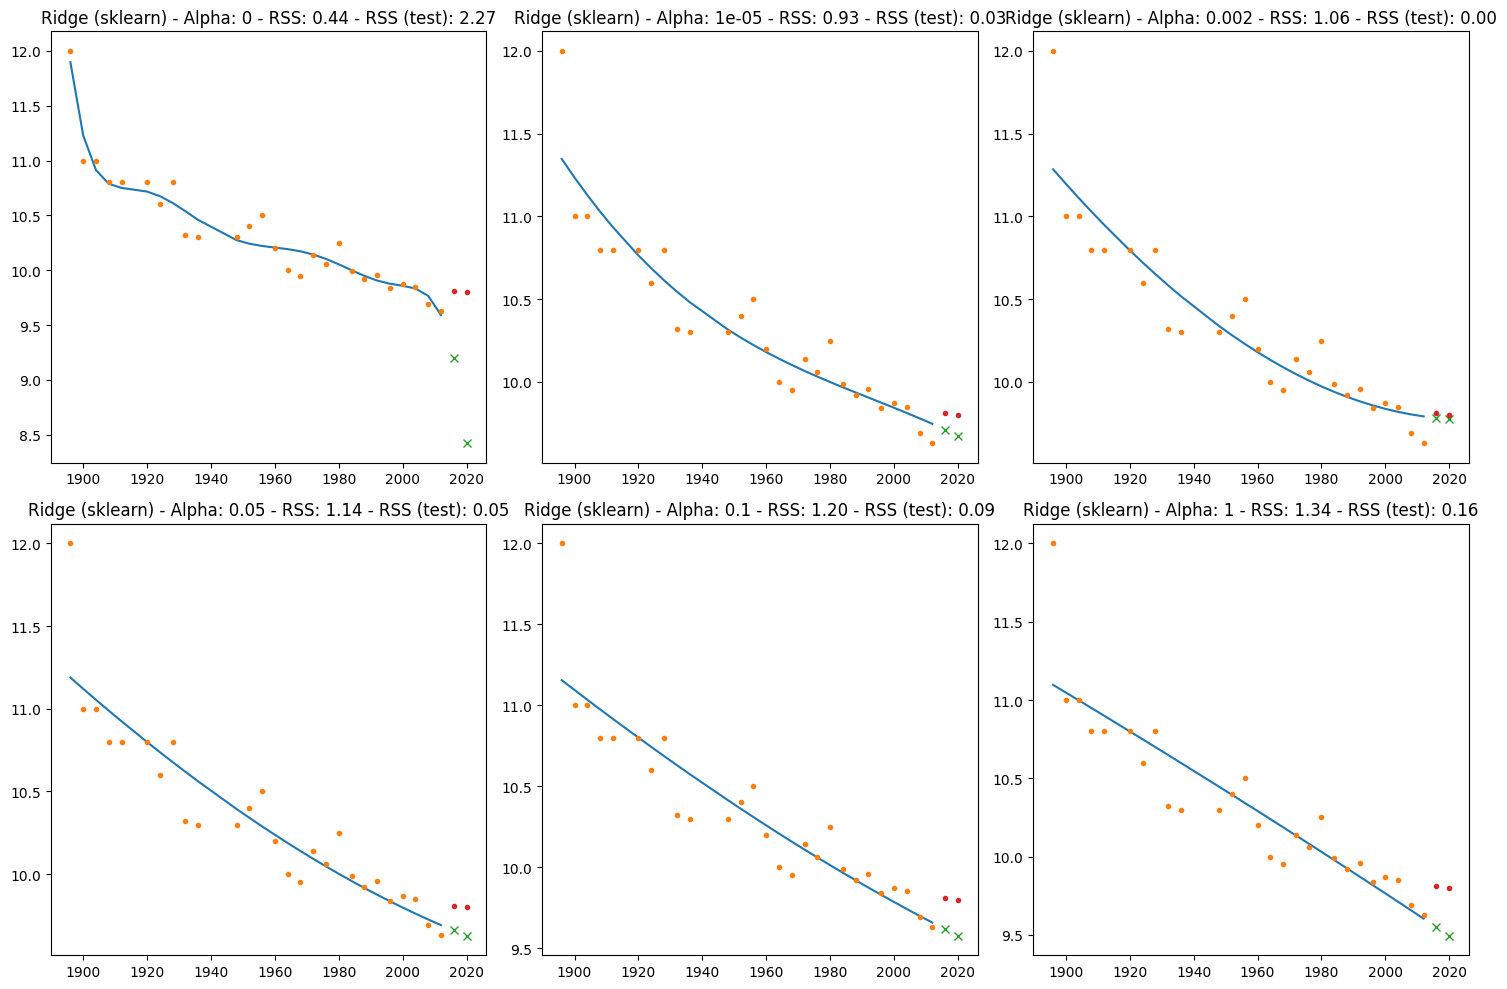

In [10]:
from sklearn.linear_model import Ridge

# Training Ridge regression models using sklearn
ridge_models = [Ridge(alpha=alpha) for alpha in alphas]

# Plotting the Ridge regression results using sklearn
for count, model in enumerate(ridge_models):
    model.fit(X_train_poly, y_train) # type: ignore
    y_hat_train_ridge = model.predict(X_train_poly)
    y_hat_test_ridge = model.predict(X_test_poly)

    plt.subplot(231+count)
    plt.tight_layout()
    plt.plot(X_train[:,0], y_hat_train_ridge)
    plt.plot(X_train[:,0], y_train, '.') # type: ignore
    plt.plot(X_test[:,0], y_hat_test_ridge, 'x')
    plt.plot(X_test[:,0], y_test, '.') # type: ignore

    rss_train_ridge = np.sum((y_train - y_hat_train_ridge) ** 2)
    rss_test_ridge = np.sum((y_test - y_hat_test_ridge) ** 2)
    plt.title(f'Ridge (sklearn) - Alpha: {alphas[count]} - RSS: {rss_train_ridge:.2f} - RSS (test): {rss_test_ridge:.2f}')

Both the sklearn library and our Ridge function produce similar plots, indicating that they are both performing effectively.
 
The plots show the line of best fit through the data points, representing the model’s predictions.

The sklearn plot that uses alpha 0 has a smoother curve fitting the data points, while the curve from our Ridge function is slightly more rigid and linear. This could be due to differences in the implementation of the algorithm.